# 问题转化为向量空间的数学运算

In [35]:
import tensorflow_hub as hub
import numpy as np

# load a pre-trained embedding
# Token based text embedding trained on Chinese Google News 100B corpus.
# https://tfhub.dev/google/nnlm-zh-dim50/2
embed = hub.load("https://tfhub.dev/google/nnlm-zh-dim50/2")

In [36]:
embed(["学生"]) # turn a string into a tensor 

<tf.Tensor: shape=(1, 50), dtype=float32, numpy=
array([[-4.61892923e-03,  3.14871520e-02, -1.37666896e-01,
        -1.80223718e-01,  3.18889290e-01,  1.59864619e-01,
        -1.30209308e-02, -6.74860328e-02,  2.50707179e-01,
         8.81165266e-02,  1.73361838e-01,  3.79935445e-05,
        -1.86411262e-01, -3.23447175e-02,  1.82978258e-01,
        -2.81624436e-01, -2.01185316e-01,  2.37850443e-01,
         4.68596071e-02,  1.18288822e-01, -1.80558890e-01,
         6.45632371e-02, -8.79279105e-04,  1.21993199e-01,
        -1.00037001e-01,  1.39083508e-02, -1.18444867e-01,
         7.55840838e-02, -6.39892668e-02, -9.03432146e-02,
        -5.55194207e-02,  1.13131203e-01, -4.65420913e-03,
        -1.44980639e-01,  2.39714831e-01,  9.70328003e-02,
         7.29109645e-02, -1.52734043e-02, -2.22533606e-02,
        -2.61341315e-02, -2.73455799e-01, -1.15428448e-01,
         9.27815959e-02, -5.35708964e-02, -2.38581806e-01,
        -1.06254369e-01, -1.78294197e-01, -1.30673364e-01,
       

In [37]:
def cos_sim(vector_a, vector_b):
    """
    计算两个向量之间的余弦相似度
    :param vector_a: 向量 a 
    :param vector_b: 向量 b
    :return: sim
    """
    vector_a = np.mat(vector_a)
    vector_b = np.mat(vector_b)
    
    num = float(vector_a * vector_b.T)
    denom = np.linalg.norm(vector_a) * np.linalg.norm(vector_b)
    
    cos = num / denom
    sim = 0.5 + 0.5 * cos
    
    return sim

In [38]:
def embeddings_cos_sim(ab):
    embeddings = embed(ab)
    B=embeddings.numpy()[1]
    A=embeddings.numpy()[0]
    print(ab, cos_sim(A, B))

In [39]:
embeddings_cos_sim(["猫","狗"])

['猫', '狗'] 0.9254584223578479


In [40]:
embeddings_cos_sim(["建筑设计","空间设计"])

['建筑设计', '空间设计'] 0.702155676317734


# 特征工程、机器学习

In [41]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn import tree

# Iris数据集是常用的分类实验数据集，
# 由Fisher, 1936收集整理。Iris也称鸢尾花卉数据集，
# 是一类多重变量分析的数据集。数据集包含150个数据集，
# 分为3类，每类50个数据，每个数据包含4个属性。
# 可通过花萼长度，花萼宽度，花瓣长度，花瓣宽度4个属性预测鸢尾花卉属于（Setosa，Versicolour，Virginica）三个种类中的哪一类。

#载入数据集
iris = datasets.load_iris()
#print(iris)
iris_data=iris['data']
#print(iris_data[0])

iris_label=iris['target']
#print(iris_label[0])
iris_target_name=iris['target_names']
print(iris_target_name)

X=np.array(iris_data)
Y=np.array(iris_label)

# print(X[0],iris_target_name[0])

# # #训练,决策树
model=tree.DecisionTreeClassifier(max_depth=3)
# # 开始训练
model.fit(X,Y)
 
# #这里预测当前输入的值的所属分类
# print('预测类别是',iris_target_name[clf.predict([[5,3,1,0.1]])[0]])

['setosa' 'versicolor' 'virginica']


DecisionTreeClassifier(max_depth=3)

In [42]:
k=[1,2,3,4]
k[0]

1

In [43]:
model.predict([ [1,3,0.5,6] ] )[0]
print('预测类别是',iris_target_name[0])

预测类别是 setosa


# 深度学习-表示学习，万物皆向量

In [44]:
#欧氏距离和余弦相似度
def dist_sim(vector_a, vector_b):
    vector_a = np.mat(vector_a)
    vector_b = np.mat(vector_b)
    dist = np.linalg.norm(vector_a - vector_b)  
    sim = 1.0 / (1.0 + dist) #归一化  
    return sim

In [45]:
dist_sim([0,0,0,1],[1,0,0,0])

0.4142135623730951

# 机器学习 分类
## 找出群体中的KOL
### 对比欧式距离与余弦相似度

In [46]:
#加载数据
import pandas as pd
df = pd.read_csv("data/students.csv") 

In [47]:
#查看下数据的前几条
df.head()

,Name,Email,School,Major,grade,Interest,Interestlevel,Code
0,王思宏,cplko@eastday.com,华中科技大学，纽约州立大学,建筑学,研三,设计与人工智能,Level2,初级
1,赵嘉惠,itmjdlaj@265.com,大连理工大学,设计学（环境方向）,研一,AI基础编程与空间设计上应用的相关案例,Level1,中极
2,杨皇惟,clcohq@126.com,南京大学,城市与建筑设计及其理论,研一,设计与AI结合的入门 以及可以应用解决哪些实际问题,Level1,高级
3,王明均,wvdqjdvinefw@163.net,伦敦大学,服务设计,研一,AI基础编程,Level1,高级
4,杨俊吉,ilamqdkjecbbu@china.com,悉尼大学,交互设计,研一,AI交互编程和设计,Level2,初级


In [48]:
student=df.loc[1,['Name','Email','School','Major','grade','Interest','Code']].values.tolist()
student

['赵嘉惠',
 'itmjdlaj@265.com',
 '大连理工大学',
 '设计学（环境方向）',
 '研一',
 'AI基础编程与空间设计上应用的相关案例',
 '中极']

In [49]:
#加载 预训练模型
import tensorflow_hub as hub
import numpy as np
embed = hub.load("https://tfhub.dev/google/nnlm-zh-dim50/2")

In [50]:
# 测试下
embeddings = embed(["".join(student)])[0]
embeddings.numpy()

array([-0.0625938 , -0.05726141, -0.13338797, -0.22062095, -0.03406555,
        0.27990812,  0.2686909 , -0.20444447, -0.05341512,  0.29666495,
        0.11364096, -0.24460523, -0.2482548 ,  0.02828717, -0.21220523,
       -0.13740006, -0.02073758, -0.2060058 ,  0.13293643,  0.18738164,
       -0.19750696, -0.08434743,  0.23032914,  0.10867558, -0.24269278,
        0.1305842 ,  0.11383242, -0.17520152, -0.14268993, -0.20751497,
        0.20880245,  0.21575421,  0.16918539,  0.1858416 , -0.08109523,
        0.2344577 ,  0.30709365,  0.08082086,  0.33298367,  0.13967022,
       -0.4116232 ,  0.2026273 , -0.18721546, -0.23647994, -0.3127673 ,
        0.00540362, -0.07225481,  0.03906581, -0.16886352, -0.02956341],
      dtype=float32)

In [51]:
#把特征转成 稠密向量
students=[]
for i in range(len(df)):
    #print(i)
    student=df.loc[i,['Email','School','Major','grade','Interest','Code']].values.tolist()
    students.append(embed(["".join(student)])[0].numpy())
students=np.array(students)

In [52]:
#每位同学的稠密向量
students

array([[ 0.3027733 , -0.0439881 , -0.0076245 , ..., -0.01432977,
        -0.01676588, -0.0508459 ],
       [ 0.07041569, -0.01964975, -0.2684328 , ...,  0.08784731,
        -0.09529525, -0.35060388],
       [-0.0988938 ,  0.14236964,  0.02276943, ..., -0.08399436,
        -0.11518561, -0.09161605],
       ...,
       [ 0.00873593,  0.07833043, -0.10353636, ..., -0.07584807,
        -0.08262399, -0.18793842],
       [ 0.04364892, -0.3225331 , -0.0396436 , ...,  0.26171824,
         0.19396819, -0.10570058],
       [ 0.08981864, -0.04354113,  0.15100561, ..., -0.19171815,
         0.06608194, -0.00543494]], dtype=float32)

In [53]:
#使用scikit learn的余弦相似度计算方法
from sklearn.metrics.pairwise import cosine_similarity
sim=cosine_similarity(students)
#查看下第一位与第二位同学的相似度
sim[0][1]

0.20929274

In [54]:
#为每位同学计算与他最相似的一位同学，只取相似度大于0.6的第一位同学
count_students={}
for i in range(len(students)):
    others=[]
    for j in range(len(students)):
        if i!=j:
            others.append({
                "index":j,
                "score":sim[i][j]
            })
    others=sorted(others, key=lambda x:x["score"],reverse=True)
    if others[0]['score']>0.6:
        print(df.loc[i,'Name'],df.loc[others[0]['index'],'Name'],others[0]['score']) 
        if not df.loc[others[0]['index'],'Name'] in count_students:
            count_students[df.loc[others[0]['index'],'Name']]=0
        count_students[df.loc[others[0]['index'],'Name']]+=others[0]['score']

杨皇惟 洪伟雨 0.67974126
王明均 洪伟雨 0.6730009
杨俊吉 许嘉人 0.639093
洪伟雨 杨皇惟 0.67974126
陈韵淳 李雅婷 0.66887295
许嘉人 杨俊吉 0.639093
吴慧娟 王明均 0.63936156
李雅婷 陈韵淳 0.66887295
吴虹志 张爱火 0.6301522
黄圣文 陈瑞柏 0.6435807
陈瑞柏 黄圣文 0.6435807
何莹隆 王明均 0.6394728
张爱火 吴虹志 0.6301522


In [55]:
# 不太可能是kol的同学（与其他同学相似性较低)
for i in range(len(students)):
    if not df.loc[i,'Name'] in count_students:
        print(df.loc[i,'Name'])

王思宏
赵嘉惠
陈威俊
胡家豪
吴慧娟
虞升贤
郭玲发
谢胤一
林淑娟
殷文馨
郭品玮
洪采木
吕少祯
林淑贞
王雅雯
李政妃
何莹隆
张毓羽
陈雅辰
许俊毅
竺淑娟


In [56]:
# 最有可能是kol的同学
sorted(count_students.items(), key=lambda x:x[1],reverse=True)

[('洪伟雨', 1.3527421355247498),
 ('王明均', 1.278834342956543),
 ('杨皇惟', 0.6797412633895874),
 ('李雅婷', 0.6688729524612427),
 ('陈韵淳', 0.6688729524612427),
 ('陈瑞柏', 0.6435806751251221),
 ('黄圣文', 0.6435806751251221),
 ('许嘉人', 0.6390929818153381),
 ('杨俊吉', 0.6390929818153381),
 ('张爱火', 0.6301522254943848),
 ('吴虹志', 0.6301522254943848)]

# 聚类算法
### 聚类班级学生

In [57]:
#引入库，并测试
from sklearn.cluster import KMeans,DBSCAN,Birch
import numpy as np

X = np.array([[1,2, 2], [1,2, 4], [1,2, 0],[4, 2,2], [4,2, 4], [4,1, 0]])

kmeans = KMeans(n_clusters=2, random_state=0).fit(X)

kmeans.labels_ #输出原始数据的聚类后的标签值


array([1, 0, 1, 0, 0, 1], dtype=int32)

In [58]:
#设置数量
model = KMeans(n_clusters =2)

In [59]:
#训练
model.fit(students)

KMeans(n_clusters=2)

In [60]:
for i in range(len(model.labels_)):
    if model.labels_[i]==0:
        print(df.loc[i,'Name'])
    

王思宏
赵嘉惠
杨俊吉
陈威俊
许嘉人
吴慧娟
郭玲发
吴虹志
陈瑞柏
殷文馨
郭品玮
吕少祯
王雅雯
李政妃
张爱火
许俊毅


In [61]:
#换一种
model=DBSCAN(eps=0.11, min_samples=2).fit(students)
print(model.labels_)

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1]


In [62]:
#换一种
model = Birch(n_clusters=2)
model.fit(students)
print(model.labels_)

[1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 1 0]


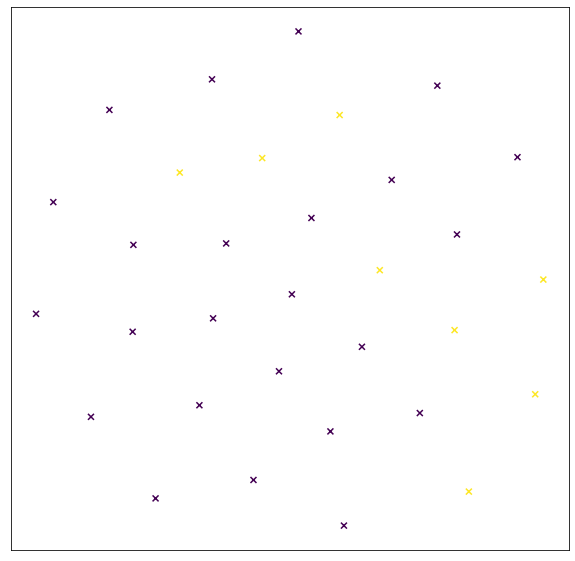

In [63]:
# 可视化查看模型学习到的分类
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(n_components=2)
decomposition_data = tsne.fit_transform(students)

x = []
y = []
 
for i in decomposition_data:
    x.append(i[0])
    y.append(i[1])
    
plt.figure(figsize=(10, 10)) 
ax = plt.axes() 
plt.scatter(x, y, c=model.labels_, marker="x") 
plt.xticks(()) 
plt.yticks(()) 
plt.show()

# 深度学习 hello world
### 手写数字分类

In [64]:
%load_ext tensorboard

#引入相关库
import cv2
from matplotlib import pyplot as plt
import tensorflow as tf
import datetime

In [65]:
# 下载mnist数据集
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [66]:
# 数据集维度
print(x_test.shape,y_test.shape)

(10000, 28, 28) (10000,)


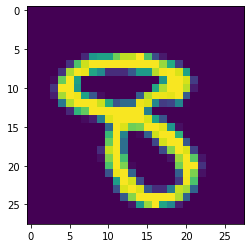

In [67]:
#查看下数据集
plt.imshow(x_test[1882])
plt.show()

In [68]:
#模型定义
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(10, activation='relu'),
  #tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [69]:
#训练开始
model.fit(x_train, y_train, epochs=5)
#评估模型
model.evaluate(x_test,  y_test, verbose=2)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5812 - accuracy: 0.8271
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3194 - accuracy: 0.9086
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2757 - accuracy: 0.9209
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2532 - accuracy: 0.9266
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2372 - accuracy: 0.9317
313/313 - 0s - loss: 0.2438 - accuracy: 0.9293


[0.2437729686498642, 0.9293000102043152]

# 颜色分类 v1.0

### 使用 Pandas 处理数据

In [70]:
#使用 Pandas 创建一个 dataframe
import pandas as pd
dataframe=pd.read_json("data/colorData.json", orient="records")

In [71]:
#预览下前面几条数据
dataframe.head()

,b,g,label,r,uid
0,155,183,green-ish,81,EjbbUhVExBSZxtpKfcQ5qzT7jDW2
1,71,22,pink-ish,249,fpqsSD6CvNNFQmRp9sJDdI1QJm32
2,33,196,orange-ish,254,fpqsSD6CvNNFQmRp9sJDdI1QJm32
3,237,147,blue-ish,170,fpqsSD6CvNNFQmRp9sJDdI1QJm32
4,225,159,blue-ish,15,fpqsSD6CvNNFQmRp9sJDdI1QJm32


In [72]:
#查看下数据类型
dataframe.dtypes

b         int64
g         int64
label    object
r         int64
uid      object
dtype: object

In [73]:
#label需要转成int
dataframe['label'] = pd.Categorical(dataframe['label'])
dataframe['label'] = dataframe.label.cat.codes

In [74]:
# 获取标签名称
#code--label
def get_label_name(label=0):
    labels=pd.Categorical(['brown-ish','blue-ish', 'green-ish', 'grey-ish', 'orange-ish',
           'pink-ish', 'purple-ish', 'red-ish', 'yellow-ish'])
    index=labels.codes.tolist().index(label)
    return labels.categories.tolist()[index]

In [75]:
# 测试下
get_label_name(3)

'grey-ish'

In [76]:
#查看标签分布
dataframe.loc[:, 'label'].value_counts()

2    1599
0    1218
6     823
5     511
7     412
1     319
8     275
4     259
3     227
Name: label, dtype: int64

In [77]:
#准备训练数据
dataframe = dataframe[['r','g','b','label']]

### 制作数据集

In [78]:
#分割成训练集、验证集、测试集
from sklearn.model_selection import train_test_split

df=dataframe.copy()

train, test = train_test_split(df, test_size=0.1)
train, val = train_test_split(train, test_size=0.1)
print(len(train), 'train examples')
print(len(val), 'validation examples')
print(len(test), 'test examples')

4570 train examples
508 validation examples
565 test examples


In [79]:
# 一种从 Pandas Dataframe 创建 tf.data 数据集的实用程序方法（utility method）
def df_to_dataset(dataframe, shuffle=True, batch_size=32):
    x = dataframe.copy()
    x=x.astype('float64')
    y = x.pop('label')
    ds = tf.data.Dataset.from_tensor_slices((x.values, y.values))
    if shuffle:
        ds = ds.shuffle(buffer_size=len(dataframe))
    ds = ds.batch(batch_size)
    return ds

In [80]:
import datetime
import tensorflow as tf
#参数

#Batch Size：一次训练所选取的样本数。
BATCH_SIZE=64
#失活率(Dropout Rate) 每层中丢弃的神经元占整层神经元的比率
DROPOUT_RATE=0.1045
#轮次，整个输入数据的单次前向和反向传递
EPOCHS=100

log_dir = "logs/fit/DROPOUT_RATE_" + str(DROPOUT_RATE)+"_"+datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [81]:
train_ds=df_to_dataset(train,batch_size=BATCH_SIZE)
val_ds=df_to_dataset(val,batch_size=BATCH_SIZE)
test_ds=df_to_dataset(test,batch_size=BATCH_SIZE)

In [82]:
for f in train_ds.take(1):
    print(f)

(<tf.Tensor: shape=(64, 3), dtype=float64, numpy=
array([[ 57., 218.,  16.],
       [115., 113.,  84.],
       [ 98., 177., 134.],
       [ 93.,  36.,  33.],
       [163.,  61.,   8.],
       [ 55., 198.,  24.],
       [124.,  93.,  44.],
       [207., 151., 253.],
       [244.,  87., 228.],
       [142., 212., 220.],
       [249., 178.,   7.],
       [160., 236., 160.],
       [213.,  79., 179.],
       [ 69., 175., 229.],
       [ 63., 103.,  89.],
       [ 74.,  24., 146.],
       [136., 247.,  84.],
       [ 30., 214., 135.],
       [190., 244.,  67.],
       [198.,  19., 233.],
       [246., 149., 102.],
       [167.,  37.,  40.],
       [ 11., 132., 209.],
       [103., 189., 211.],
       [210.,  21., 197.],
       [ 98.,  71., 134.],
       [248., 215., 169.],
       [152., 182.,  26.],
       [104., 134.,  82.],
       [135., 184., 143.],
       [ 30., 191.,  62.],
       [114.,  76., 109.],
       [ 43., 203., 242.],
       [122., 225.,  52.],
       [192.,  83., 138.],
     

### 模型

In [83]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(12, input_shape=(3,),activation='softplus'),
  tf.keras.layers.Dense(48, activation='relu'),
  tf.keras.layers.Dropout(DROPOUT_RATE),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(DROPOUT_RATE),
  tf.keras.layers.Dense(48, activation='relu'),
  tf.keras.layers.Dense(9, activation='softmax')
])

#optimizer=tf.keras.optimizers.SGD(learning_rate=0.25)

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 12)                48        
_________________________________________________________________
dense_4 (Dense)              (None, 48)                624       
_________________________________________________________________
dropout (Dropout)            (None, 48)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               6272      
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 48)                6192      
_________________________________________________________________
dense_7 (Dense)              (None, 9)                

In [84]:
model.fit(train_ds,
          validation_data=val_ds,
          epochs=EPOCHS,
             callbacks=[tensorboard_callback])

Epoch 1/100
72/72 [==============================] - 1s 10ms/step - loss: 3.4724 - accuracy: 0.4586 - val_loss: 1.0171 - val_accuracy: 0.6890
Epoch 2/100
72/72 [==============================] - 0s 2ms/step - loss: 1.3860 - accuracy: 0.5932 - val_loss: 0.9593 - val_accuracy: 0.7185
Epoch 3/100
72/72 [==============================] - 0s 3ms/step - loss: 1.1362 - accuracy: 0.6365 - val_loss: 0.8838 - val_accuracy: 0.7382
Epoch 4/100
72/72 [==============================] - 0s 3ms/step - loss: 1.0821 - accuracy: 0.6525 - val_loss: 0.8669 - val_accuracy: 0.7441
Epoch 5/100
72/72 [==============================] - 0s 3ms/step - loss: 1.0138 - accuracy: 0.6652 - val_loss: 0.8237 - val_accuracy: 0.7480
Epoch 6/100
72/72 [==============================] - 0s 2ms/step - loss: 0.9727 - accuracy: 0.6812 - val_loss: 0.8222 - val_accuracy: 0.7677
Epoch 7/100
72/72 [==============================] - 0s 5ms/step - loss: 0.9306 - accuracy: 0.7000 - val_loss: 0.8079 - val_accuracy: 0.7618
Epoch 8/100


In [85]:
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 34514), started 0:44:18 ago. (Use '!kill 34514' to kill it.)

In [86]:
test_loss, test_acc = model.evaluate(test_ds, verbose=2)
print('\nTest accuracy:', test_acc)

9/9 - 0s - loss: 0.7196 - accuracy: 0.7894

Test accuracy: 0.7893805503845215


### 预测

In [87]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [88]:
import numpy as np
predictions = probability_model.predict(np.array([[110,2,25]]))

In [89]:
predictions[0]

array([0.10077797, 0.10693475, 0.10086907, 0.09815466, 0.09727252,
       0.10100164, 0.1039957 , 0.19264033, 0.09835334], dtype=float32)

In [90]:
get_label_name(np.argmax(predictions[0]))

'red-ish'

# RGB转HSV
### rgb->hsv

In [91]:
import cv2
# opencv
import numpy as np
from matplotlib import pyplot as plt

(28, 32)
(28, 32, 3)


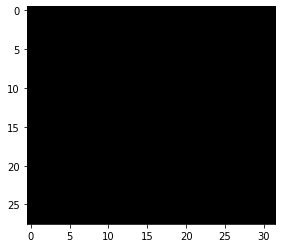

In [92]:
#创建一张黑色的图片
img = np.zeros((28,32), np.float32)
print(img.shape)
img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
print(img.shape)
plt.imshow(img)
plt.show()

In [93]:
rgb_to_hsv([110,2,25])

NameError: name 'rgb_to_hsv' is not defined

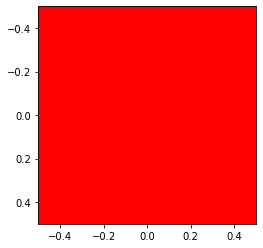

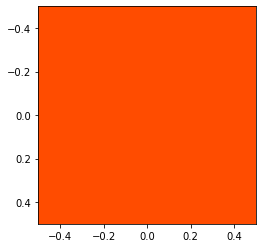

[[[255   0   0]]] [[[255  76   0]]]


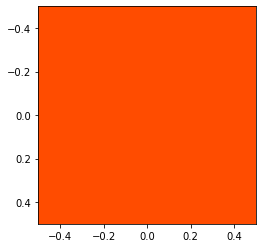

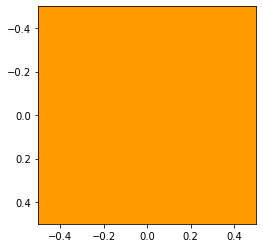

[[[255  76   0]]] [[[255 153   0]]]


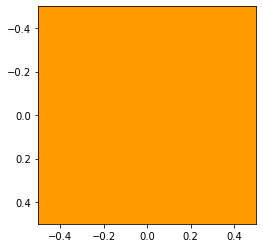

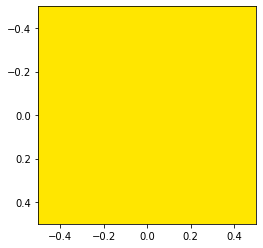

[[[255 153   0]]] [[[255 230   0]]]


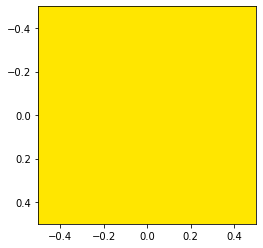

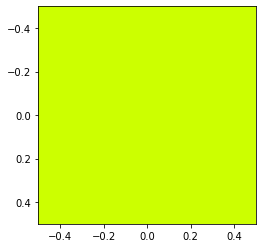

[[[255 230   0]]] [[[204 255   0]]]


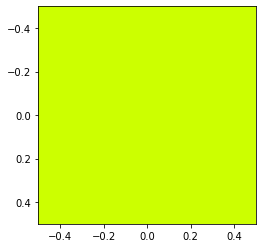

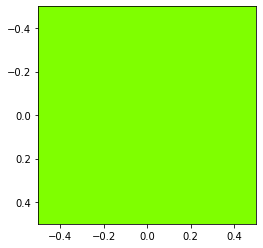

[[[204 255   0]]] [[[127 255   0]]]


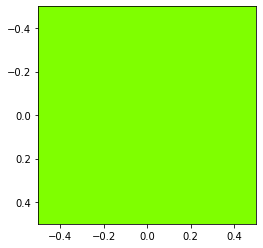

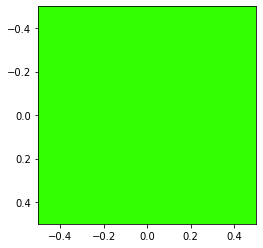

[[[127 255   0]]] [[[ 51 255   0]]]


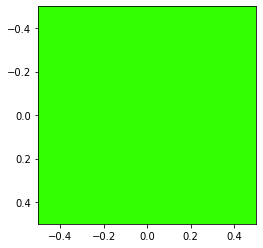

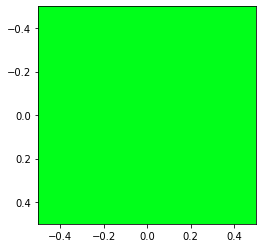

[[[ 51 255   0]]] [[[  0 255  26]]]


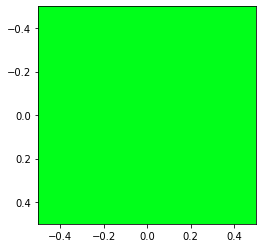

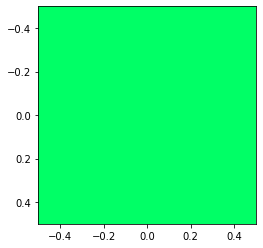

[[[  0 255  26]]] [[[  0 255 102]]]


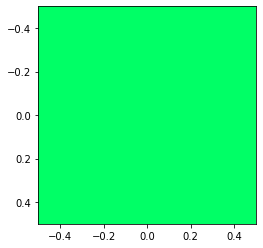

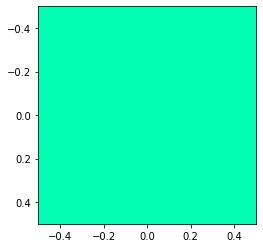

[[[  0 255 102]]] [[[  0 255 179]]]


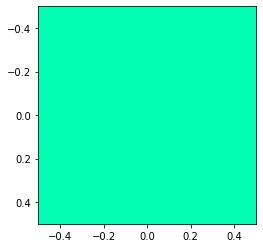

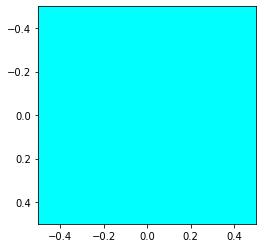

[[[  0 255 179]]] [[[  0 255 255]]]


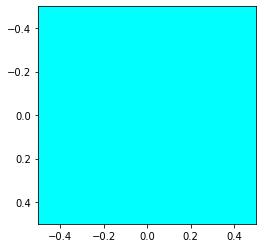

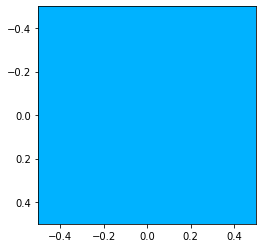

[[[  0 255 255]]] [[[  0 178 255]]]


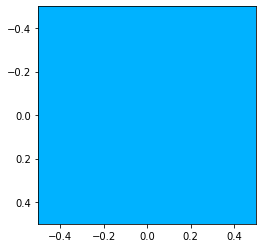

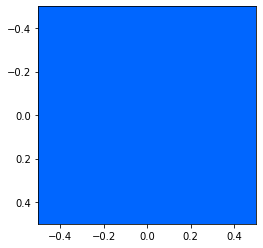

[[[  0 178 255]]] [[[  0 102 255]]]


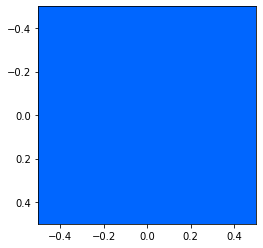

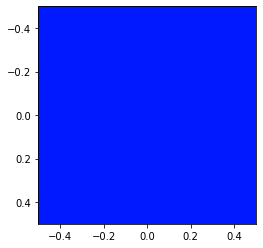

[[[  0 102 255]]] [[[  0  25 255]]]


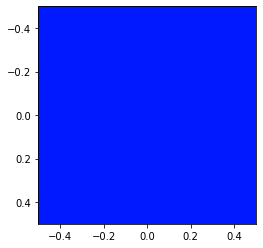

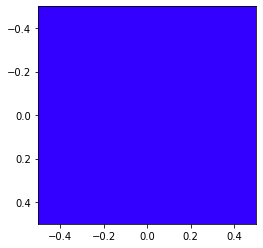

[[[  0  25 255]]] [[[ 51   0 255]]]


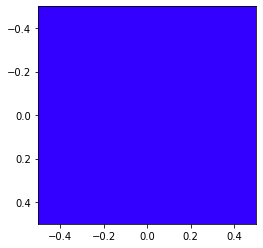

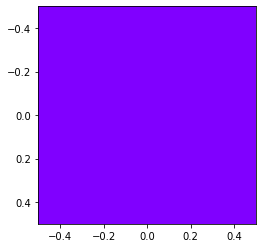

[[[ 51   0 255]]] [[[128   0 255]]]


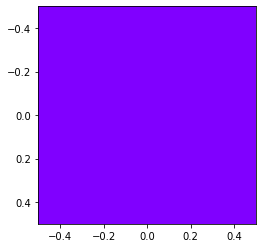

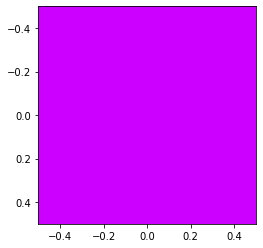

[[[128   0 255]]] [[[204   0 255]]]


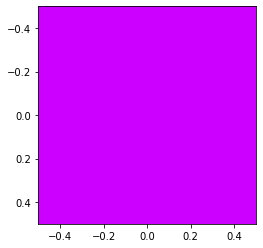

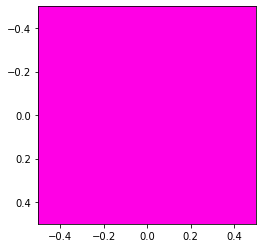

[[[204   0 255]]] [[[255   0 229]]]


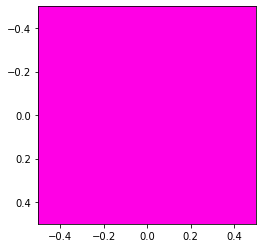

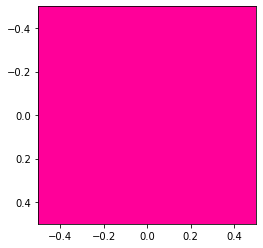

[[[255   0 229]]] [[[255   0 153]]]


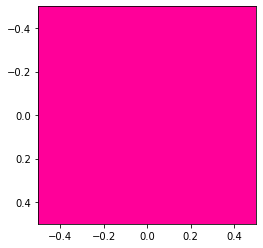

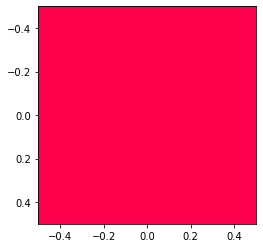

[[[255   0 153]]] [[[255   0  76]]]


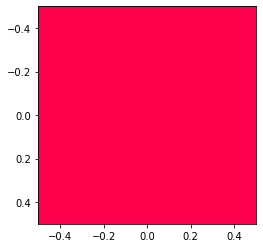

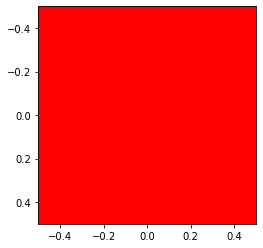

[[[255   0  76]]] [[[255   0   0]]]


In [94]:
'''
HSV颜色空间规定:H范围0~360,S范围0~1,V范围0~1 

PS中的HSV范围，H是0-360，S是0-1，V（B）是0-1

opencv中的HSV范围，H是0-180，S是0-255，V是0-255

'''

# h:0-360 , s:0-255, v:0-255
# r:0-255, g:0-255, b:0-255
def rgb_to_hsv(rgb=[]):
    img=np.array([[rgb]],np.uint8)
    #print(img)
    #print(img)
    plt.imshow(img)
    plt.show()
    img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    img_hsv[0][0]*=2
    #print(img_hsv)
    return img_hsv


def hsv_to_rgb(hsv=[]):
    hsv[0]/=2
    img_hsv=np.array([[hsv]],np.uint8)
    img_rgb = cv2.cvtColor(img_hsv, cv2.COLOR_HSV2RGB)
    plt.imshow(img_rgb)
    plt.show()
    return img_rgb

#rgb_to_hsv([250,0,0])
#hsv_to_rgb([360,255,255])

# 从h=0 开始旋转，每18°取一组颜色，作为配色方案
for i in range(0,360,18):
    #print(i)
    a=hsv_to_rgb([i,255,255])
    b=hsv_to_rgb([i+18,255,255])
    print(a,b)

In [95]:
#opencv读取图片，默认是BGR
img=cv2.imread('img/test.jpg',cv2.IMREAD_COLOR)
img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

error: OpenCV(4.2.0) /Users/travis/build/skvark/opencv-python/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'
